# Visualizing The Gender Gap Across College Degrees

The Department of Education Statistics releases a data set annually containing the percentage of bachelor's degrees granted to women from 1970 to 2012. The data set is broken up into 17 categories of degrees, with each column as a separate category.

Randal Olson, a data scientist at University of Pennsylvania, has cleaned the data set and made it available on his personal website. You can download the dataset Randal compiled [here](http://www.randalolson.com/wp-content/uploads/percent-bachelors-degrees-women-usa.csv). 

In this project we will generate line charts to compare and visualize the gender gap across all degrees categories.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')

Here is a preview of the first few rows of the dataset:

In [2]:
# Displays the first 3 rows of the dataset
women_degrees.head(3)

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1


In [3]:
women_degrees.shape

(42, 18)

There are 42 rows and 18 columns in this dataset.

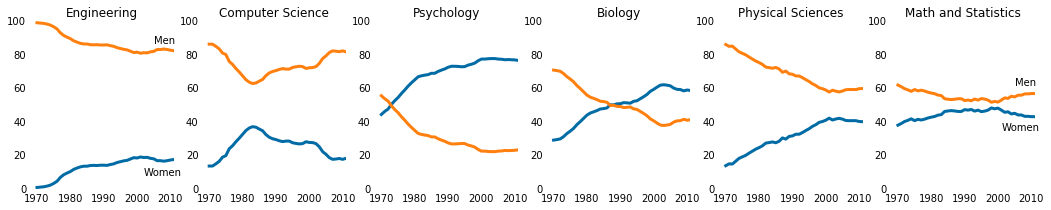

In [4]:
# This whole block of code creates line charts for the STEM fields
cb_dark_blue = (0/255,107/255,164/255) # colorblind friendly RGB codes
cb_orange = (255/255, 128/255, 14/255)
# Stem field list
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology',
             'Physical Sciences', 'Math and Statistics']

fig = plt.figure(figsize=(18, 3))

# Itereates through the stem field list and creates a colorblind friendly
# line chart for each category and gender
for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue,
            label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange,
            label='Men', linewidth=3)   
    for key,spine in ax.spines.items(): # Removes chart borders
        spine.set_visible(False)    
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    # Removes x and y tick markers
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    if sp == 0:                  # Annotates the line chart with 
        ax.text(2005, 87, 'Men') # labels for men and women for only the first
        ax.text(2002, 8, 'Women')# and last charts
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
plt.show()

We can see that within the STEM fields the largest disparity between genders falls in the engineering and computer science categories.

Meanwhile the gender gaps in biology, physical sciences, and mathematics are quite small in comparison, as the gap has narrowed over the last 4 decades.

When the gender gap in the workforce is discussed, there is usualy an arguement to increase the percentage of women in underrepresented fields. It is worth noting that there is a growing gender gap in the field of psychology, only this field is dominated by women as opposed to men.

## Generating charts for all categories

We will group the 17 represented degree categories into 3 fields in descending order by the percentage of degrees awarded to women: 
* STEM
* liberal arts
* other

We will then generate line charts for them using a subplot grid layout of 6 rows by 3 columns, adjusting the format to reduce clutter, increase our data/ink ratio and  enable the viewer to quickly get a high level understanding of which degrees are prone to gender imbalance and how that has changed over time.

In [5]:
# 17 degee fields ordered by the percentage of degrees awarded to women

## stem categories list
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 
             'Physical Sciences', 'Computer Science', 'Engineering']

## liberal arts categories list
lib_arts_cats = ['Foreign Languages', 'English', 
                 'Communications and Journalism', 'Art and Performance',
                 'Social Sciences and History']

## other categories list
other_cats = ['Health Professions', 'Public Administration', 'Education', 
              'Agriculture','Business', 'Architecture']

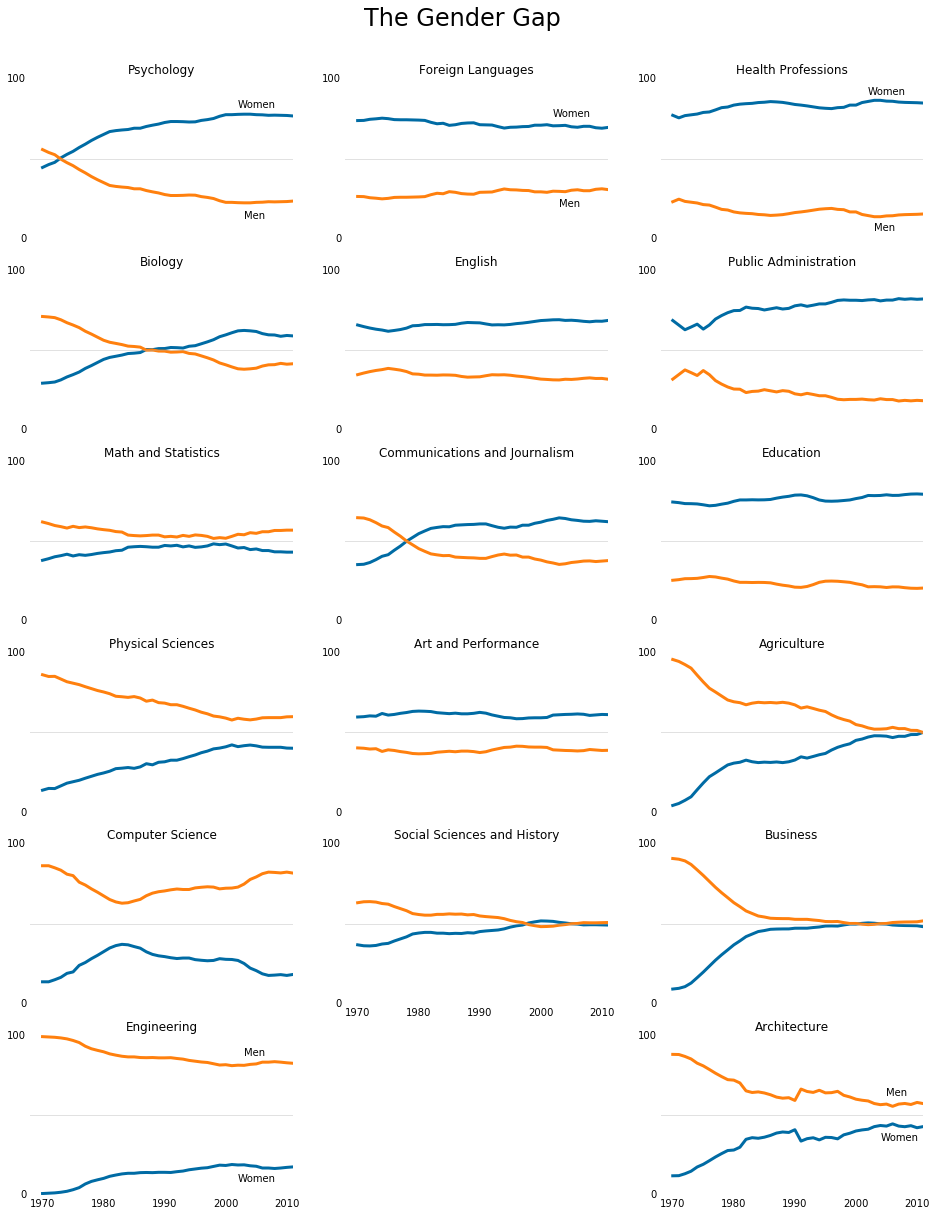

In [24]:
# This whole block of code creates 6 x 3 line charts for the all fields

fig = plt.figure(figsize=(16, 20))

## Generate first column of line charts. STEM degrees.
for sp in range(0,18,3):
    category_index = int(sp/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[category_index]],
            c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[category_index]],
            c=cb_orange, label='Men', linewidth=3)   
    for key,spine in ax.spines.items(): # Removes chart borders
        spine.set_visible(False)    
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_yticks([0,100]) # Displays ony the 0 and 100 labels on the y-axis
    ax.set_title(stem_cats[category_index])
    
    # Removes x and y tick markers and x-axis labels
    ax.tick_params(bottom="off", top="off", left="off", right="off",
                   labelbottom='off')
    
    # Generates a transparent, colorblind-friendly horizontal line across
    # all of the line chart to label the 50% value on the y-axis
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.35)
    
    if category_index == 0:        # Annotates the line chart with 
        ax.text(2002, 82, 'Women') # labels for men and women for only the first
        ax.text(2003, 12, 'Men')   # and last charts
    elif category_index == 5:
        ax.text(2003, 87, 'Men')
        ax.text(2002, 8, 'Women')
        ax.tick_params(labelbottom='on') # displays x-axis labels only on 
                                         # the bottom most line charts
    
## Generate second column of line charts. liberal arts degrees.
for sp in range(1,16,3):
    category_index = int((sp-1)/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], 
            women_degrees[lib_arts_cats[category_index]], c=cb_dark_blue,
            label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 
            100-women_degrees[lib_arts_cats[category_index]], c=cb_orange, 
            label='Men', linewidth=3)   
    for key,spine in ax.spines.items():
        spine.set_visible(False)    
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_yticks([0,100])
    ax.set_title(lib_arts_cats[category_index])
    ax.tick_params(bottom="off", top="off", left="off", right="off",
                  labelbottom='off')
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.35)
    
    if category_index == 0:
        ax.text(2003, 20, 'Men')
        ax.text(2002, 76, 'Women')
    elif category_index == 4:
        ax.tick_params(labelbottom='on')
        
## Generate third column of line charts. Other degrees.
for sp in range(2,20,3):
    category_index = int((sp-2)/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[category_index]],
            c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[category_index]],
            c=cb_orange, label='Men', linewidth=3)   
    for key,spine in ax.spines.items():
        spine.set_visible(False)    
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_yticks([0,100])
    ax.set_title(other_cats[category_index])
    ax.tick_params(bottom="off", top="off", left="off", right="off",
                  labelbottom='off')
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.35)
    
    if category_index == 0:
        ax.text(2003, 5, 'Men')
        ax.text(2002, 90, 'Women')
    elif category_index == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2004, 34, 'Women')
        ax.tick_params(labelbottom='on')

fig.suptitle('The Gender Gap', y=0.95,  fontsize=24) # add title to figure

plt.savefig('gender_degrees.png') # Exports the plot we created in PNG       
plt.show()                        # format for use in other applications

Here we see that liberal arts degrees are primarily predominated by women.
There are significant disparities in the heath professions(i.e nursing, techs, etc.), public administration, and education fields where we see women make up greater than 80% of graduates.

It is clear that the gender gap is not only about women being underrepresented in certain fields, but also men.

Perhaps there is an emphasis on leveling the gender gap when it comes to computer science and engineering because these are more lucrative fields in comparison to say education and public administration.

## Conclusion

We generated visualizations to compare the gender gap across 17 degree categories from data released by the Department of Education Statistics.

We found that there are marked differences in gender diversity in various fields, with women being underrepresented in computer science and engineering and men being underrepresented in the health professions, education, and public administration fields.